# Portfolio of Stocks Demo

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from utilities import (
    process_leveraged_data, 
    find_ath_indices, 
    calculate_ath_returns_all_periods, 
    calculate_non_ath_returns_all_periods,
    plot_returns
)

## Simulating Leveraged Portfolio Data  

##### The function `process_leveraged_data()` processes historical price data for multiple tickers (e.g., "QQQ", "SPY", "SOXX"). It simulates leveraged returns for each ticker based on a specified leverage factor (e.g., 3x) and adjusts the returns according to the portfolio weights assigned to each ticker.  

**For each ticker, the following calculations are performed:**
- `DailyReturn`: This represents the daily percentage change in the adjusted close prices of the ticker.
- `LeveragedReturn`: The daily leveraged returns are simulated by multiplying the daily returns by the specified leverage scalar.
- `WeightedLeveragedReturn`: These leveraged returns are then adjusted by the portfolio weight for each ticker, reflecting its contribution to the overall portfolio.
- `SimulatedLeveragedPrice`: The cumulative leveraged price is calculated by compounding the leveraged returns over time. The starting price is based on the initial adjusted close price of the unleveraged ticker.

**Summary:**
- `TotalPortfolioReturn`: The total portfolio return is calculated by summing the weighted leveraged returns of all tickers.
- `TotalPortfolioPrice`: The total portfolio price is calculated by summing the simulated leveraged prices for each ticker.


*Note: The return for each ticker is multiplied by its corresponding leverage scalar and portfolio weight, where the return at index 0 is scaled by the leverage scalar and weight at index 0, the return at index 1 by the leverage scalar and weight at index 1, and so on.*

In [2]:
# Define inputs
tickers = ["QQQ", "SPY", "SOXX"] # Tickers that make up the portfolio
leverage_scalars = [3, 3, 3]  # Leverage scalars for each respective ticker
portfolio_weights = [0.6, 0.2, 0.2]  # Portfolio weights summing to 1.0

# Process the data
data = process_leveraged_data(tickers, leverage_scalars, portfolio_weights)
data.head()

,Date,DailyReturn_QQQ,AdjClose_QQQ,LeveragedReturn_QQQ_3X,SimulatedLeveragedPrice_QQQ_3X,WeightedLeveragedReturn_QQQ_3X,DailyReturn_SPY,AdjClose_SPY,LeveragedReturn_SPY_3X,SimulatedLeveragedPrice_SPY_3X,WeightedLeveragedReturn_SPY_3X,DailyReturn_SOXX,AdjClose_SOXX,LeveragedReturn_SOXX_3X,SimulatedLeveragedPrice_SOXX_3X,WeightedLeveragedReturn_SOXX_3X,TotalPortfolioReturn,TotalPortfolioPrice
0,2001-07-16,-0.018540,35.951275,-0.055620,35.407973,-0.033372,-0.012517,78.173210,-0.037550,78.569557,-0.007510,-0.057949,18.885532,-0.173848,19.350221,-0.034770,-0.267017,133.327752
1,2001-07-17,0.022432,36.757732,0.067296,36.837660,0.040378,0.009362,78.905067,0.028086,79.010898,0.005617,0.041058,19.660931,0.123173,19.826908,0.024635,0.218555,135.675465
2,2001-07-18,-0.038107,35.357018,-0.114320,34.310891,-0.068592,-0.006813,78.367523,-0.020438,78.687939,-0.004088,-0.041404,18.846899,-0.124211,19.334365,-0.024842,-0.258968,132.333195
3,2001-07-19,0.023770,36.197453,0.071310,35.778914,0.042786,0.008760,79.053986,0.026279,79.101500,0.005256,0.042460,19.647131,0.127379,19.826923,0.025476,0.224967,134.707338
4,2001-07-20,-0.023218,35.357018,-0.069654,34.283623,-0.041793,-0.005980,78.581253,-0.017940,78.817690,-0.003588,-0.004916,19.550550,-0.014747,19.768445,-0.002949,-0.102341,132.869758


## Plotting The Returns of Simulated Leveraged Portfolio Data  
The `plot_returns` function uses the data generated from process_leveraged_data to analyze and visualize forward returns during All-Time High (ATH) and Non-ATH periods across different time windows, allowing you to <ins>assess how the portfolio performs when buying close to an ATH versus not</ins>. 

#### Key Features:
- **Window Periods** (`windows=`): You can specify a list of window sizes (e.g., [5, 10, 20]), where each window defines the range of days before and after an ATH event that is included in the analysis. For instance, a window size of 5 includes data from 5 days before and after the ATH date.
- **Custom Price Column** (`price_column`): By default, the analysis uses the TotalPortfolioPrice column, but you can specify a different column to track price changes, allowing flexibility in the analysis.

#### What it does:
- For each window, the function identifies ATH indices, which essentially tell us that if you are to buy within the defined days before, after, or on an ATH, you can expect the following forward-looking returns.
- The returns are then visualized using a boxplot that compares the return distributions across multiple holding periods (e.g., 3M, 6M, 12M, 24M, 48M).

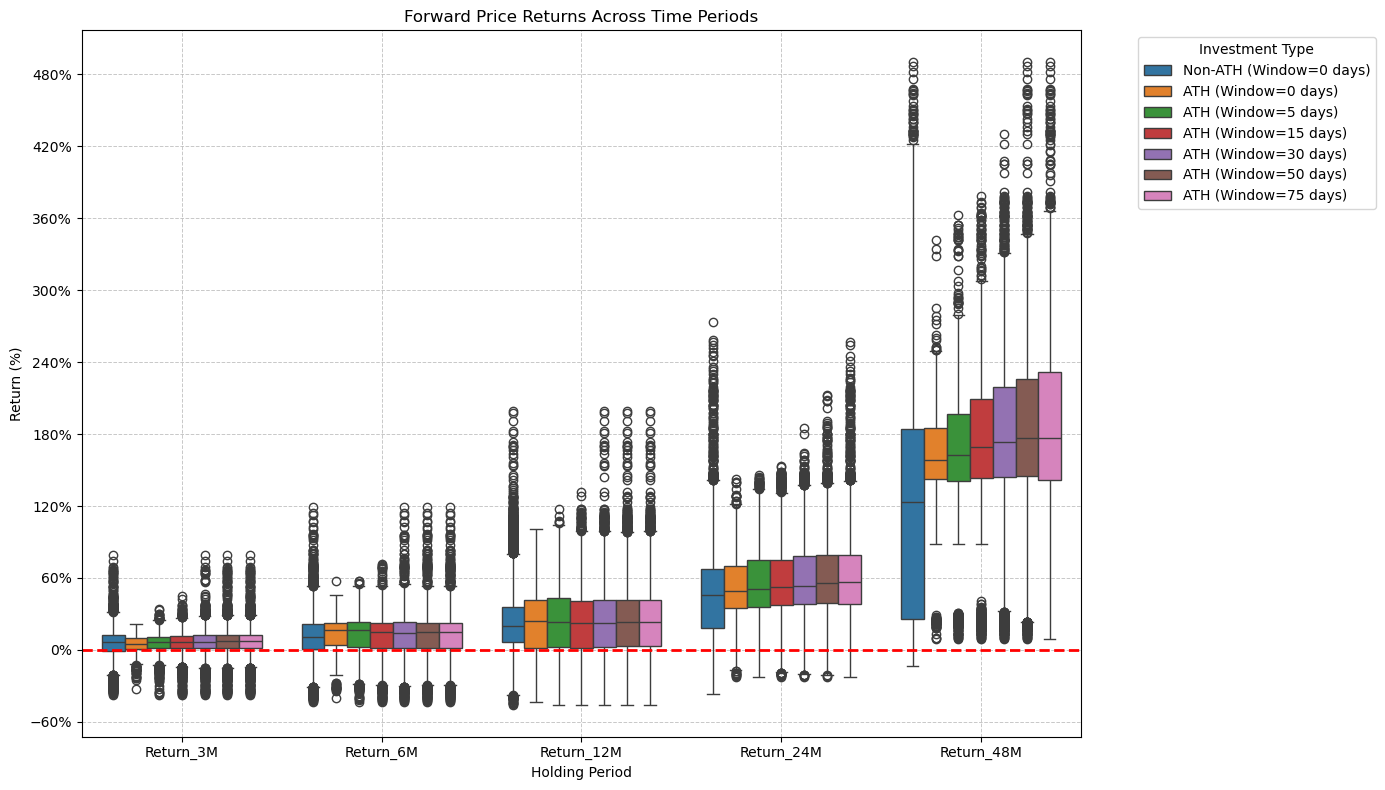

In [3]:
plot_returns(data, windows=[0, 5, 15, 30, 50, 75])

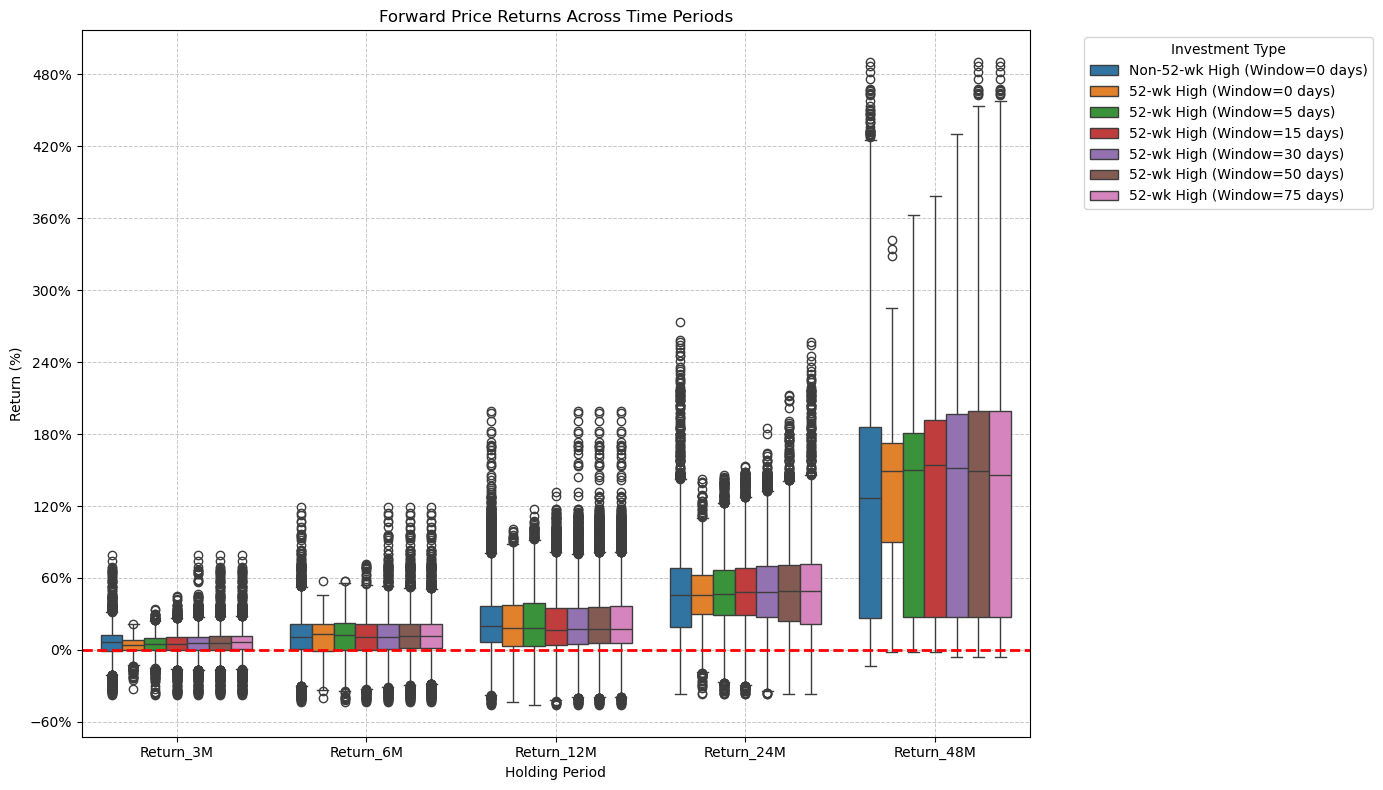

In [4]:
plot_returns(data, windows=[0, 5, 15, 30, 50, 75], high_type="52W")